### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

#### Transaction Dataset

### Loading the Dataset

In [2]:
# Loading the dataset
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

# Loading first few values
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Customer Behaviour Dataset

In [18]:
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


### Summarization of Dataset (customer behaviour)

In [19]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
customer_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


### Handling missind data (if missing data is present)

In [21]:
customer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Summarization of Dataset (transaction data)

In [3]:
# describing the statistics
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [4]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### Checking Duplicates

In [5]:
print(transaction_data.duplicated().sum())

1


### Handling Missing Data (if missing data is present)

In [6]:
# Checking nulls
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

### Checking for Outliers

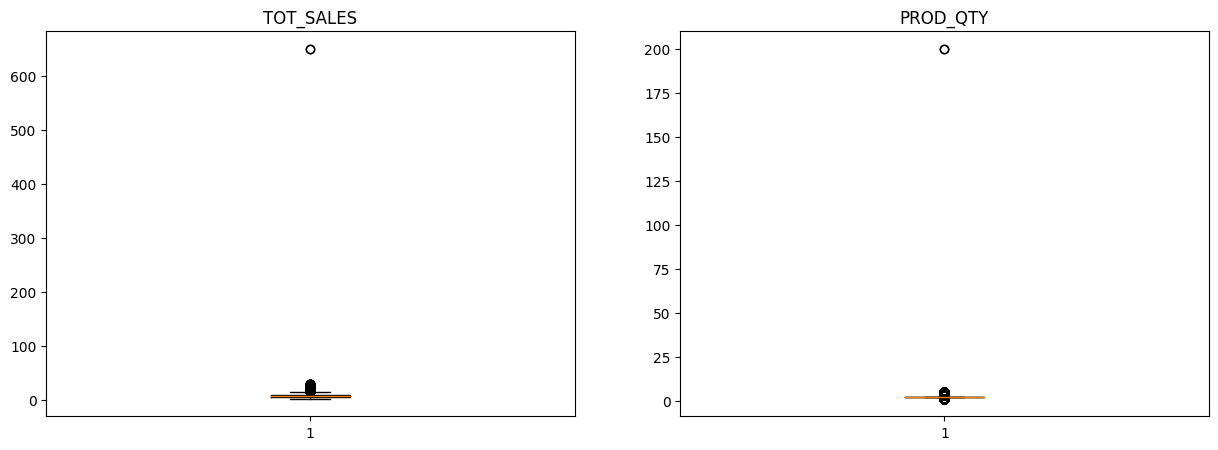

In [7]:
# Checking for outliers
figure, axis = plt.subplots(1,2,figsize=(15,5))
axis[0].boxplot(transaction_data['TOT_SALES'])
axis[1].boxplot(transaction_data['PROD_QTY'])
axis[0].set_title('TOT_SALES')
axis[1].set_title('PROD_QTY')
plt.show()
                           

In [8]:
# removing outliers
transaction_data = transaction_data[transaction_data['TOT_SALES'] < 500]
transaction_data = transaction_data[transaction_data['PROD_QTY'] < 100]
transaction_data = transaction_data.reset_index(drop = True)
print(transaction_data.shape[0])

264834


##### Two rows are removed from the dataset

<AxesSubplot: xlabel='TOT_SALES'>

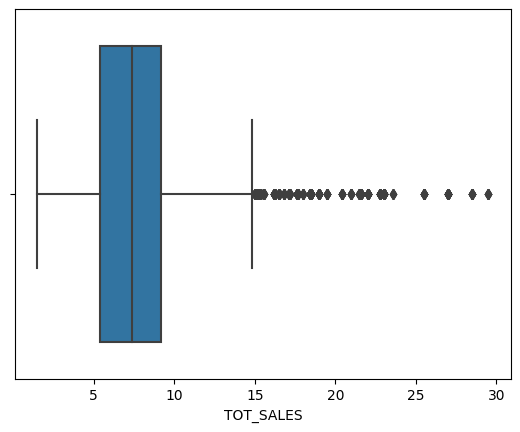

In [9]:
sns.boxplot(x = transaction_data['TOT_SALES'])

### Calculating number of unique products

In [10]:
# Checking the number of unique products
unique_products = list(transaction_data['PROD_NAME'].unique())
print(f"Total unique products : {len(unique_products)} ") 

Total unique products : 114 


### Extract Additional Features (Pack Size & Brand Name)

In [11]:
# Extract Brand Name (everything before the pack size)
transaction_data['Brand'] = transaction_data['PROD_NAME'].str.extract(r'(^[A-Za-z\s]+)(?=\d+g|\d+kg)')

# Extract Pack Size (last digits followed by "g" or "kg")
transaction_data['Pack_Size'] = transaction_data['PROD_NAME'].str.extract(r'(\d+(?:g|kg))')

# Optionally: Remove any rows with missing brand or pack size information
transaction_data = transaction_data.dropna(subset=['Brand', 'Pack_Size'])

# Check the result
print(transaction_data[['PROD_NAME', 'Brand', 'Pack_Size']].head())


                                  PROD_NAME  \
0    Natural Chip        Compny SeaSalt175g   
1                  CCs Nacho Cheese    175g   
2    Smiths Crinkle Cut  Chips Chicken 170g   
5  Old El Paso Salsa   Dip Tomato Mild 300g   
7     Grain Waves         Sweet Chilli 210g   

                                  Brand Pack_Size  
0    Natural Chip        Compny SeaSalt      175g  
1                  CCs Nacho Cheese          175g  
2    Smiths Crinkle Cut  Chips Chicken       170g  
5  Old El Paso Salsa   Dip Tomato Mild       300g  
7     Grain Waves         Sweet Chilli       210g  


### Deriving Metrics of Interest

#### 1) Total spend per customer

In [12]:
# Total spend per customer (sum of TOT_SALES for each customer)
customer_spend = transaction_data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()

# Check the result
print(customer_spend.head())

   LYLTY_CARD_NBR  TOT_SALES
0            1000        6.0
1            1003        3.0
2            1004        1.9
3            1005        2.8
4            1007        2.7


#### 2) Average spend per product

In [13]:
# Calculate average spend per product
transaction_data['Avg_Spend_Per_Product'] = transaction_data['TOT_SALES'] / transaction_data['PROD_QTY']

# Check the result
print(transaction_data[['PROD_NAME', 'Avg_Spend_Per_Product']].head())

                                  PROD_NAME  Avg_Spend_Per_Product
0    Natural Chip        Compny SeaSalt175g                   3.00
1                  CCs Nacho Cheese    175g                   2.10
2    Smiths Crinkle Cut  Chips Chicken 170g                   1.45
5  Old El Paso Salsa   Dip Tomato Mild 300g                   5.10
7     Grain Waves         Sweet Chilli 210g                   3.60


#### 3) Pack Size Preferences

In [14]:
# Sum of sales by pack size
pack_size_sales = transaction_data.groupby('Pack_Size')['TOT_SALES'].sum().reset_index()

# Check the result
print(pack_size_sales)

   Pack_Size  TOT_SALES
0       110g    93347.0
1       125g     5733.0
2       134g   155178.0
3       135g    26090.4
4       150g   111767.0
5       160g     5323.8
6       165g    49894.4
7       170g   130575.1
8       175g   340333.4
9       190g     5169.6
10      200g    10757.8
11      210g    21700.8
12      220g     6831.0
13      250g    26096.7
14      270g    55425.4
15      300g   113330.6
16      330g   101990.1
17      380g    75419.6
18       70g     6852.0


#### 4) Brand Preferences

In [15]:
# Sum of sales by brand
brand_sales = transaction_data.groupby('Brand')['TOT_SALES'].sum().reset_index()

# Check the result
print(brand_sales)

                              Brand  TOT_SALES
0                     Burger Rings      6831.0
1              CCs Nacho Cheese         5961.9
2                     CCs Original      6048.0
3              CCs Tasty Cheese         6069.0
4                    Cheetos Puffs      7641.2
..                              ...        ...
69       WW Original Stacked Chips      5323.8
70  WW Supreme Cheese   Corn Chips      5390.3
71       Woolworths Cheese   Rings      5169.6
72       Woolworths Medium   Salsa      4050.0
73       Woolworths Mild     Salsa      4234.5

[74 rows x 2 columns]


#### 5) Most and least Selling Brands

In [16]:
# Group by brand and calculate total sales
brand_sales = transaction_data.groupby('Brand')['TOT_SALES'].sum().reset_index()

# Sort the brands by total sales in descending order to find the most selling brand
brand_sales_sorted = brand_sales.sort_values('TOT_SALES', ascending=False)

# Most selling brand
most_selling_brand = brand_sales_sorted.iloc[0]

# Least selling brand
least_selling_brand = brand_sales_sorted.iloc[-1]

# Display the results
print("Most Selling Brand:")
print(most_selling_brand)

print("\nLeast Selling Brand:")
print(least_selling_brand)

Most Selling Brand:
Brand        Dorito Corn Chp     Supreme 
TOT_SALES                         39052.0
Name: 8, dtype: object

Least Selling Brand:
Brand        Woolworths Medium   Salsa 
TOT_SALES                        4050.0
Name: 72, dtype: object


#### 6) Most and Least Selling Products

In [17]:
# Group by product and calculate total sales
product_sales = transaction_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort the products by total sales in descending order to find the most selling product
product_sales_sorted = product_sales.sort_values('TOT_SALES', ascending=False)

# Most selling product
most_selling_product = product_sales_sorted.iloc[0]

# Least selling product
least_selling_product = product_sales_sorted.iloc[-1]

# Display the results
print("Most Selling Product:")
print(most_selling_product)

print("\nLeast Selling Product:")
print(least_selling_product)

Most Selling Product:
PROD_NAME    Dorito Corn Chp     Supreme 380g
TOT_SALES                             39052.0
Name: 8, dtype: object

Least Selling Product:
PROD_NAME    Woolworths Medium   Salsa 300g
TOT_SALES                            4050.0
Name: 72, dtype: object


### Merging the datasets

In [23]:
merged_data = pd.merge(transaction_data, customer_data, on="LYLTY_CARD_NBR", how="inner")
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size,Avg_Spend_Per_Product,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt,175g,3.00,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175g,2.10,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,WW Original Stacked Chips,160g,1.90,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,CCs Original,175g,2.10,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170g,1.45,MIDAGE SINGLES/COUPLES,Budget


In [24]:
merged_data.isnull().sum()

DATE                     0
STORE_NBR                0
LYLTY_CARD_NBR           0
TXN_ID                   0
PROD_NBR                 0
PROD_NAME                0
PROD_QTY                 0
TOT_SALES                0
Brand                    0
Pack_Size                0
Avg_Spend_Per_Product    0
LIFESTAGE                0
PREMIUM_CUSTOMER         0
dtype: int64

### Segmenting Customers

In [27]:
customer_segments = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_spend=('TOT_SALES', 'sum'),
    avg_spend=('TOT_SALES', 'mean'),
    purchase_frequency=('TXN_ID', 'count'),
    chips_qty=('PROD_QTY', 'sum')
).reset_index()

print(customer_segments)

                 LIFESTAGE PREMIUM_CUSTOMER  total_spend  avg_spend  \
0   MIDAGE SINGLES/COUPLES           Budget     24368.00   7.295808   
1   MIDAGE SINGLES/COUPLES       Mainstream     63782.35   7.874364   
2   MIDAGE SINGLES/COUPLES          Premium     40576.25   7.352102   
3             NEW FAMILIES           Budget     15487.95   7.551414   
4             NEW FAMILIES       Mainstream     12041.50   7.521237   
5             NEW FAMILIES          Premium      8046.60   7.513165   
6           OLDER FAMILIES           Budget    114992.65   7.513404   
7           OLDER FAMILIES       Mainstream     70219.55   7.474936   
8           OLDER FAMILIES          Premium     55799.70   7.431043   
9    OLDER SINGLES/COUPLES           Budget     95652.30   7.641181   
10   OLDER SINGLES/COUPLES       Mainstream     92645.50   7.519317   
11   OLDER SINGLES/COUPLES          Premium     91919.75   7.682386   
12                RETIREES           Budget     78966.30   7.689775   
13    

### Visualizing Key Metrics

#### 1) Total Spend by Customer Segment

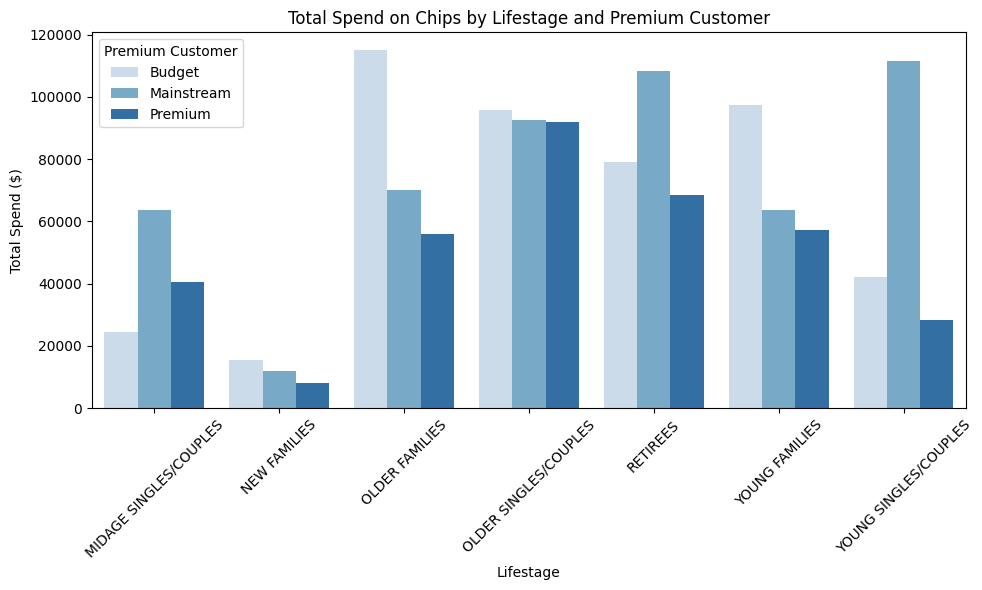

In [28]:
# Group by lifestage and premium_customer, calculating total spend
segment_spend = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_spend=('TOT_SALES', 'sum')
).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='LIFESTAGE', y='total_spend', hue='PREMIUM_CUSTOMER', data=segment_spend, palette='Blues')
plt.title('Total Spend on Chips by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Total Spend ($)')
plt.legend(title='Premium Customer', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2) Average Spend by Customer Segment

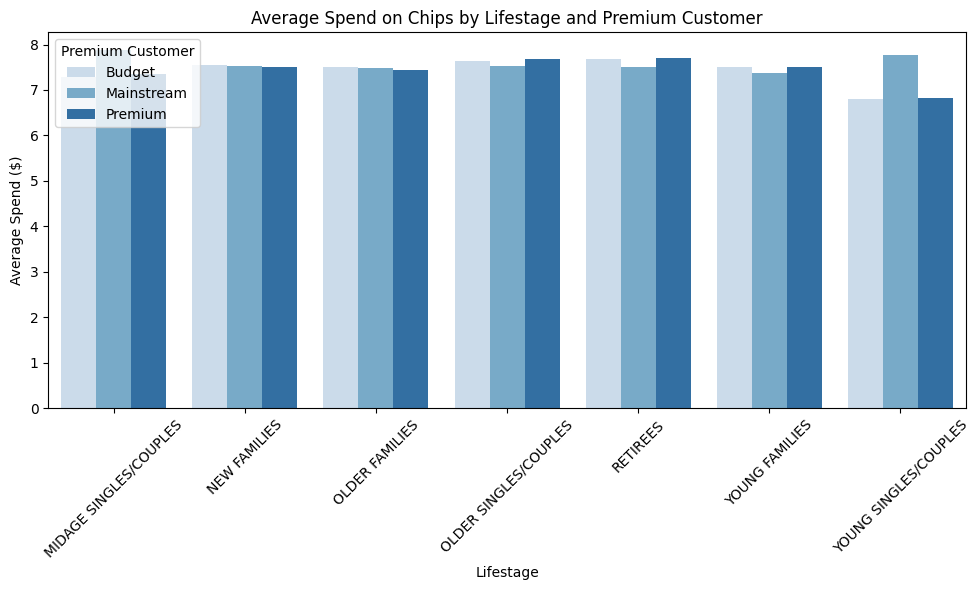

In [30]:
# Group by lifestage and premium_customer, calculating average spend
segment_spend = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_spend=('TOT_SALES', 'mean')
).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='LIFESTAGE', y='total_spend', hue='PREMIUM_CUSTOMER', data=segment_spend, palette='Blues')
plt.title('Average Spend on Chips by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Average Spend ($)')
plt.legend(title='Premium Customer', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3) Spending Distribution Accross Customers

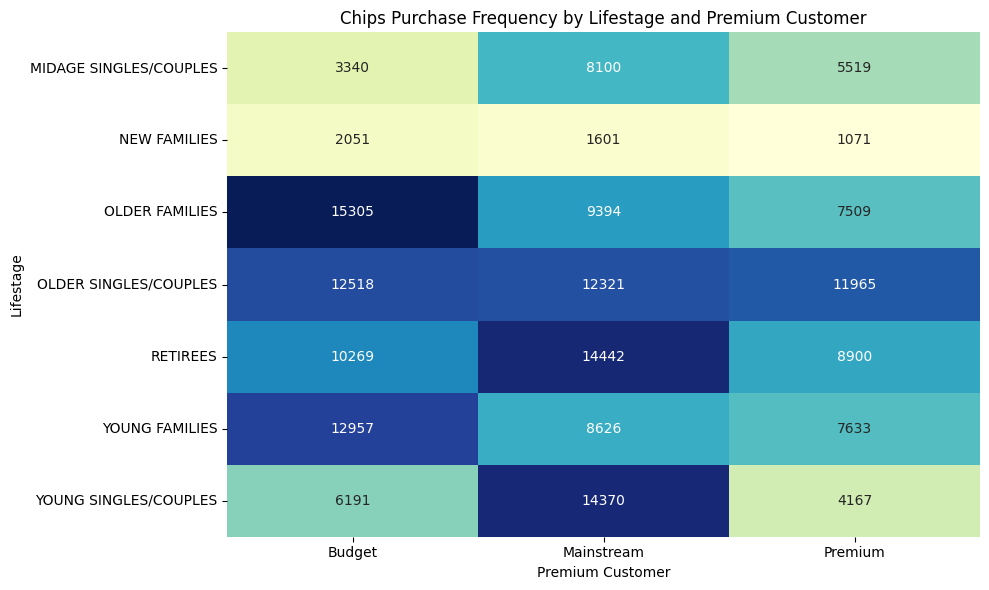

In [32]:
# Calculate the frequency of purchases by segment
purchase_freq = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TXN_ID'].count().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(purchase_freq, annot=True, fmt="d", cmap='YlGnBu', cbar=False)
plt.title('Chips Purchase Frequency by Lifestage and Premium Customer')
plt.xlabel('Premium Customer')
plt.ylabel('Lifestage')
plt.tight_layout()
plt.show()
